# Watershed Algorithm

## Importando módulos necessários

In [8]:
# Importando módulos do Python

import numpy as np # operações matemáticas e matriciais
import matplotlib.pyplot as plt # visualização das imagens e histogramas
from scipy import ndimage # contém a operação de convolução (convolve) para a aplicação de filtros digitais
from skimage import io # leitura e escrita de imagens
from skimage import filters # filtros
from skimage import color # conversão de cores
from skimage import segmentation # algoritmos de segmentação

## Lendo a imagem

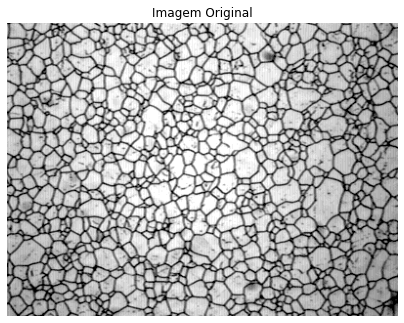

In [9]:
# Lendo imagem a ser segmentada

img = io.imread('data/images/grains.png')
img = img[:,:,0] # A imagem é monocromática, mas contém 3 canais. Aqui é extraído apenas o primeiro canal.
img = img/255.0

plt.figure(figsize = (7,7))
plt.imshow(img, cmap='gray'), plt.title('Imagem Original'), plt.axis('off')
plt.show()

## Seguimentando a imagem

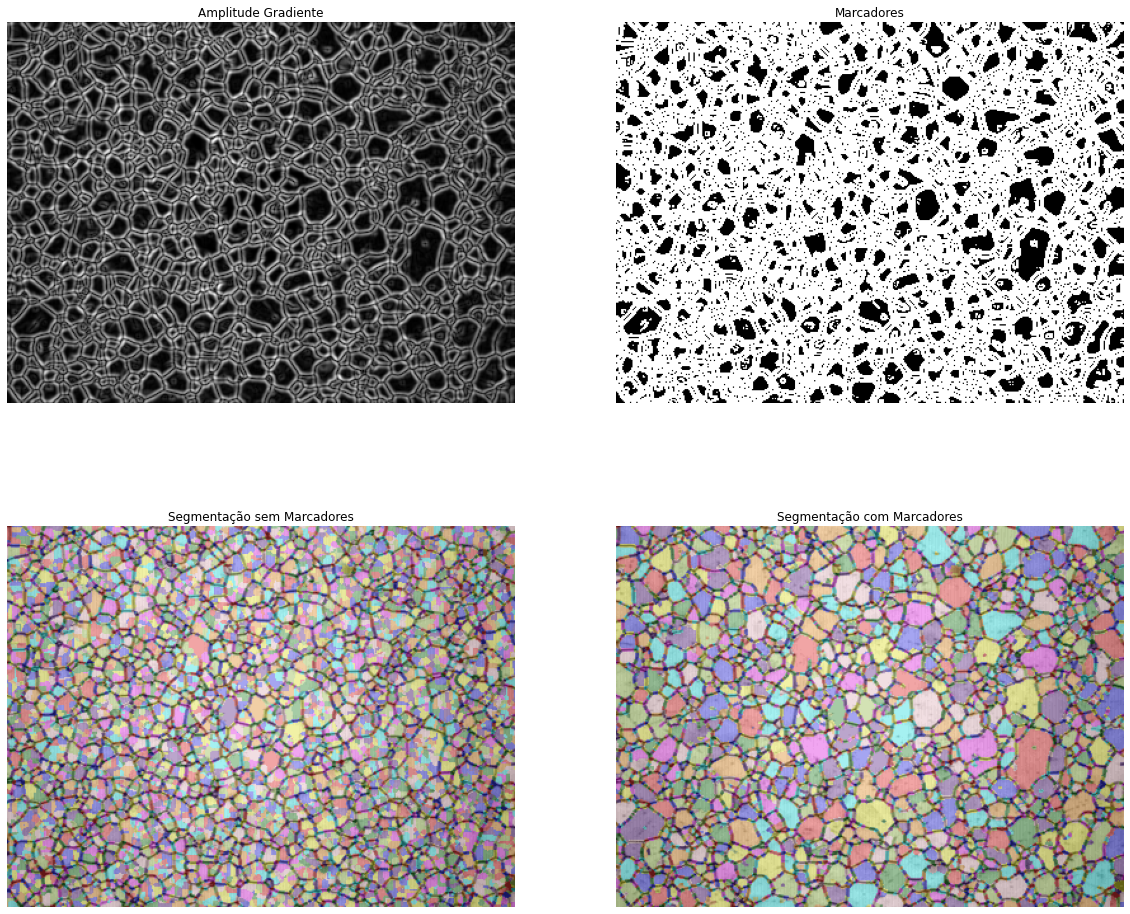

In [10]:
# Segmentando a imagem

# Aplicando filtro gaussiano 5x5 com sigma=1
wsize = 5
sigma = 1
truncate = (((wsize - 1)/2)-0.5)/sigma
imgF = filters.gaussian(img, sigma=sigma, truncate=truncate)

# Calculando a amplitude do gradiente
sobelx = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
Gx = ndimage.convolve(imgF, sobelx)
Gy = ndimage.convolve(imgF, sobely)
G = abs(Gx) + abs(Gy)
G = G / np.amax(G) # Normalizando o gradiente entre 0 e 1

# Segmentação sem marcadores
imgW1 = segmentation.watershed(G)
imgL1 = color.label2rgb(imgW1, img)

# Segmentação com marcadores
markers = G > 0.12 # Melhor limiar para "grains.png" (encontrado empiricamente)
GM = G * markers # Todos os pixels com intensidade menor que 0.12 vão estar igual a zero
imgW2 = segmentation.watershed(GM)
imgL2 = color.label2rgb(imgW2, img)

plt.figure(figsize = (20,17))
plt.subplot(2,2,1), plt.imshow(G, cmap='gray'), plt.title('Amplitude Gradiente'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(markers, cmap='gray'), plt.title('Marcadores'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(imgL1), plt.title('Segmentação sem Marcadores'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(imgL2), plt.title('Segmentação com Marcadores'), plt.axis('off')
plt.show()

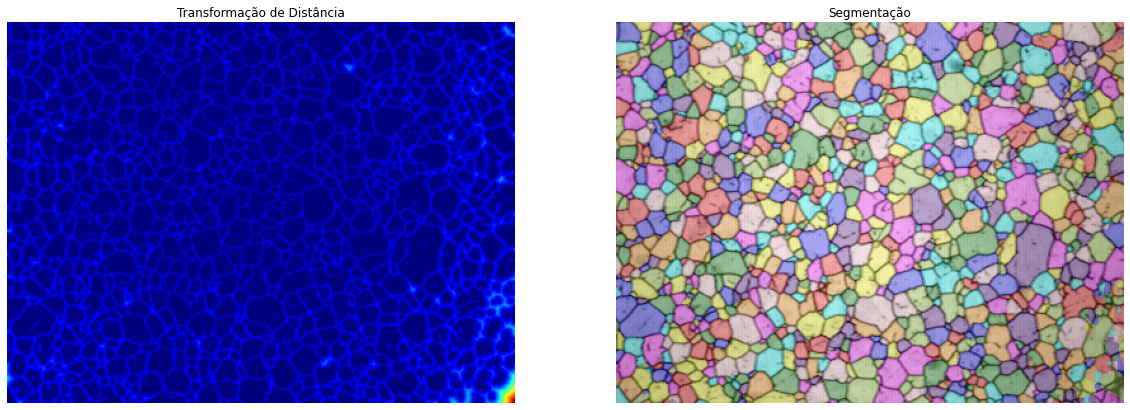

In [11]:
from scipy.ndimage import morphology # Contém a função distance_transform_edt

imgB = img < 0.6 # Melhor limiar para "grains.png" (encontrado empiricamente)
imgD = morphology.distance_transform_edt(img*imgB) # Estudem a documentação da função
imgD[0][0] = 0

imgW3 = segmentation.watershed(imgD)
imgL3 = color.label2rgb(imgW3, img)

plt.figure(figsize = (20,17))
plt.subplot(1,2,1), plt.imshow(imgD, cmap='jet'), plt.title('Transformação de Distância'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(imgL3), plt.title('Segmentação'), plt.axis('off')
plt.show()

## Mais um exemplo

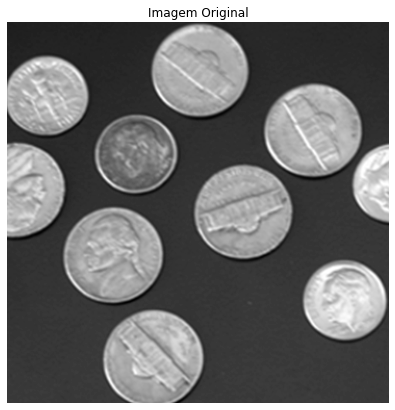

In [12]:
# Lendo imagem a ser segmentada

img = io.imread('data/images/coins.png') # Imagem monocromática com apenas um canal
img = img/255.0

plt.figure(figsize = (7,7))
plt.imshow(img, cmap='gray'), plt.title('Imagem Original'), plt.axis('off')
plt.show()

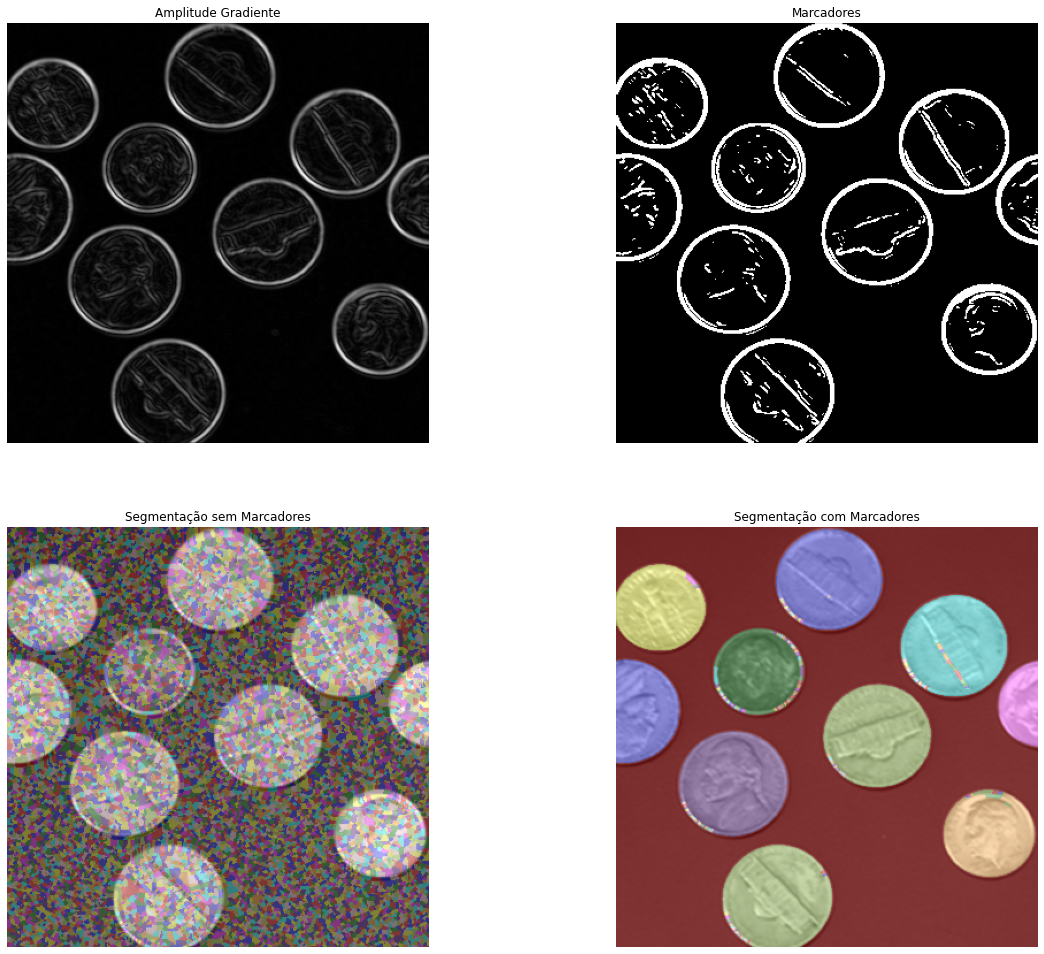

In [13]:
# Segmentando a imagem

# Aplicando filtro gaussiano 5x5 com sigma=1
wsize = 5
sigma = 1
truncate = (((wsize - 1)/2)-0.5)/sigma
imgF = filters.gaussian(img, sigma=sigma, truncate=truncate)

# Calculando a amplitude do gradiente
sobelx = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
Gx = ndimage.convolve(imgF, sobelx)
Gy = ndimage.convolve(imgF, sobely)
G = abs(Gx) + abs(Gy)
G = G / np.amax(G)

# Segmentação sem marcadores
imgW1 = segmentation.watershed(G)
imgL1 = color.label2rgb(imgW1, img)

# Segmentação com marcadores
markers = G > 0.18 # Melhor limiar para "Coins.png" (encontrado empiricamente)
GM = G * markers
imgW2 = segmentation.watershed(GM)
imgL2 = color.label2rgb(imgW2, img)

plt.figure(figsize = (20,17))
plt.subplot(2,2,1), plt.imshow(G, cmap='gray'), plt.title('Amplitude Gradiente'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(markers, cmap='gray'), plt.title('Marcadores'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(imgL1), plt.title('Segmentação sem Marcadores'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(imgL2), plt.title('Segmentação com Marcadores'), plt.axis('off')
plt.show()

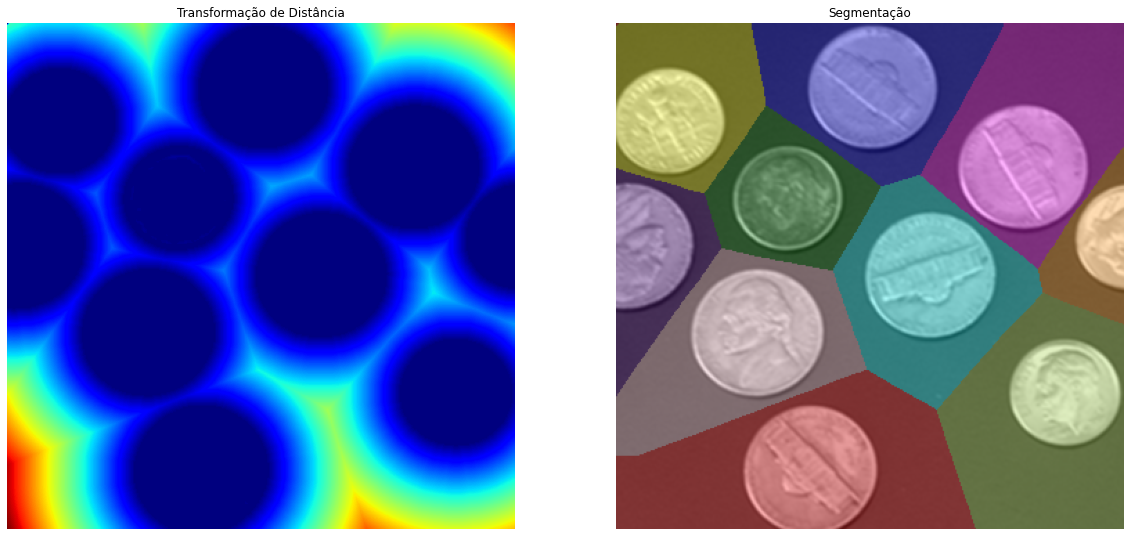

In [14]:
imgB = img < 0.4 # Melhor limiar para "grains.png" (encontrado empiricamente)
imgD = morphology.distance_transform_edt(img*imgB) # Estudem a documentação da função
imgD[0][0] = 0

imgW3 = segmentation.watershed(imgD)
imgL3 = color.label2rgb(imgW3, img)

plt.figure(figsize = (20,17))
plt.subplot(1,2,1), plt.imshow(imgD, cmap='jet'), plt.title('Transformação de Distância'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(imgL3), plt.title('Segmentação'), plt.axis('off')
plt.show()